Normalizaion type: minmax scaling,mean normalization, max absolut scaling,robust scaling

minmax scaling
formula= (xi-x_min)/(x_max-x_min)
range=[0,1]

outlier also effect

mean normalization:
formula= (xi-x_mean)/x_max-x_min
range=[-1,1]
it use when we want to centred data

Max Absolut Scaling:=
formula= (xi)/abs(x_max)
class in sklearn= MaxAbsScaler
it is use in sparse data or zero in your data set

Robust Scaling:=
formula= (xi-x_meadian)/IQR,
IQR=(75th percentilvalue- 25th percentilvalue,
class in sklearn= RobustScaler
when your data set have outlier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic acid']
df

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

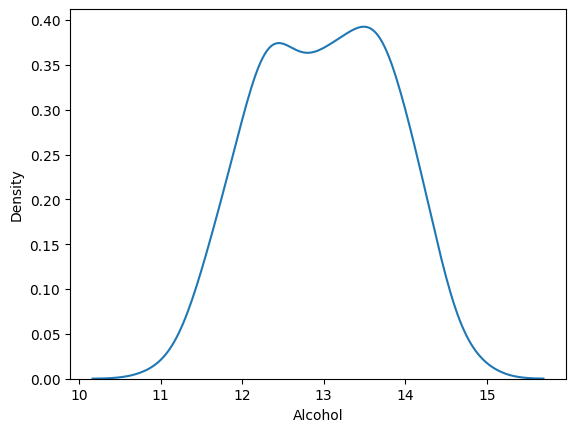

In [3]:
sns.kdeplot(df['Alcohol'])

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Malic acid', ylabel='Density'>

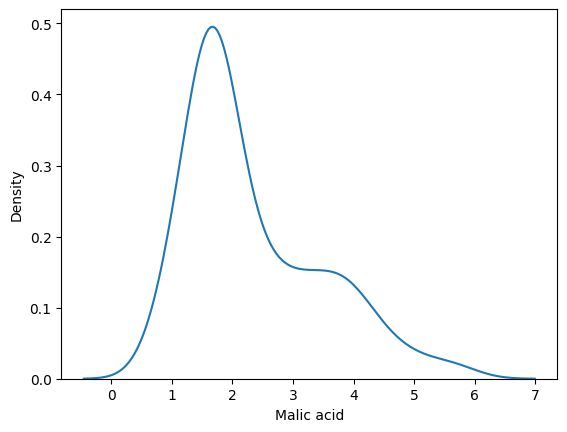

In [4]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic acid'>

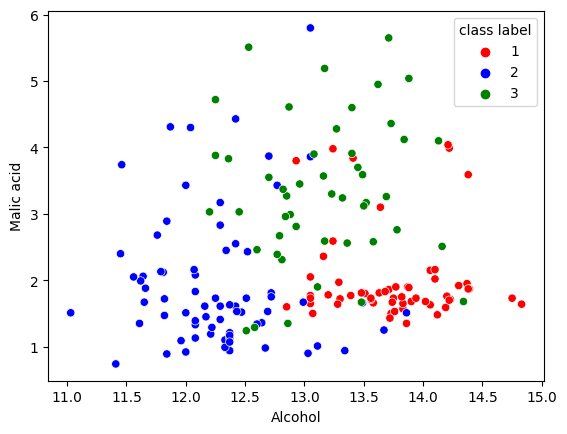

In [5]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['class label'],palette=color_dict)

In [6]:
x=df.iloc[:,1:]
x

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [7]:
y=df.iloc[:,0:1]
y

,class label
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

MinMax Scaler Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [10]:
x_train_scaler=pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [11]:
np.round(x_train.describe(),1) # without scaling

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(x_train_scaler.describe(),1) # with scaling

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Effect of Scaling

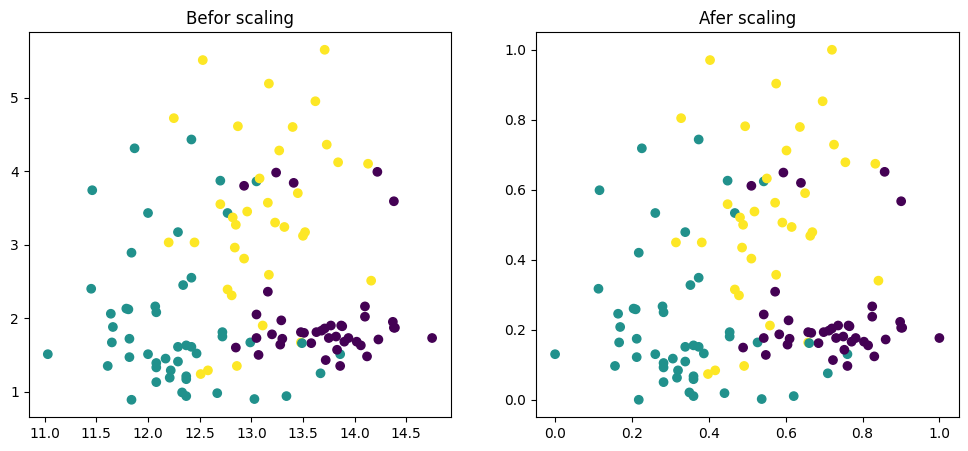

In [22]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train['class label'])
ax1.set_title('Befor scaling')
ax2.scatter(x_train_scaler['Alcohol'], x_train_scaler['Malic acid'],c=y_train['class label'])
ax2.set_title('Afer scaling')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

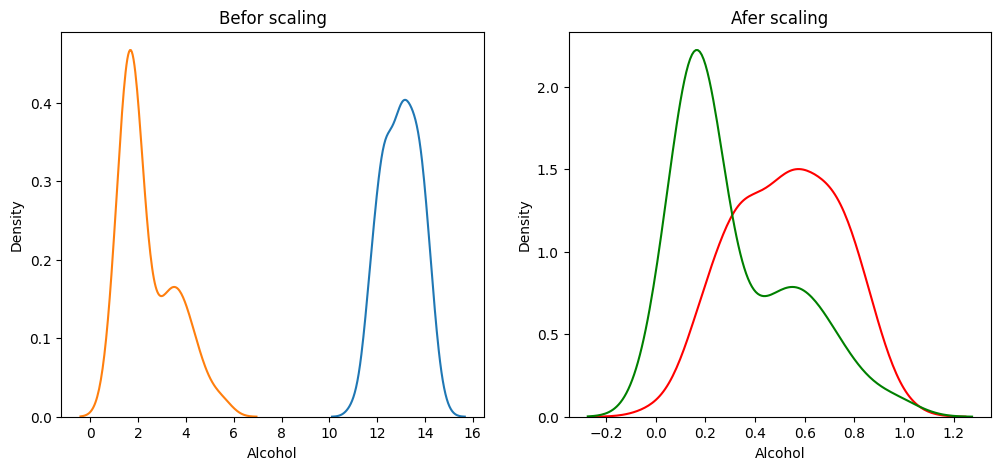

In [24]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
ax1.set_title('Befor scaling')

sns.kdeplot(x_train_scaler['Alcohol'], ax=ax2,color='red')
sns.kdeplot(x_train_scaler['Malic acid'],ax=ax2,color='green')
ax2.set_title('Afer scaling')
plt.show()

# Manual Normalization

In [34]:
x['Malic acid'].max()

5.8

In [30]:
Alcohol=[]
Alcohol_min=x['Alcohol'].min()
Alcohol_max=x['Alcohol'].max()
for i in x['Alcohol']:
    Alcohol.append(float("{:.2f}".format((i-Alcohol_min)/(Alcohol_max-Alcohol_min))))
Alcohol

[0.84,
 0.57,
 0.56,
 0.88,
 0.58,
 0.83,
 0.88,
 0.8,
 1.0,
 0.74,
 0.81,
 0.81,
 0.72,
 0.98,
 0.88,
 0.68,
 0.86,
 0.74,
 0.83,
 0.69,
 0.8,
 0.5,
 0.71,
 0.48,
 0.65,
 0.53,
 0.62,
 0.6,
 0.75,
 0.79,
 0.71,
 0.67,
 0.7,
 0.72,
 0.65,
 0.64,
 0.59,
 0.53,
 0.54,
 0.84,
 0.67,
 0.63,
 0.75,
 0.58,
 0.53,
 0.84,
 0.88,
 0.76,
 0.81,
 0.77,
 0.53,
 0.74,
 0.73,
 0.72,
 0.71,
 0.67,
 0.84,
 0.59,
 0.71,
 0.35,
 0.34,
 0.42,
 0.69,
 0.35,
 0.3,
 0.35,
 0.55,
 0.35,
 0.61,
 0.31,
 0.33,
 0.74,
 0.65,
 0.52,
 0.24,
 0.17,
 0.53,
 0.21,
 0.34,
 0.44,
 0.26,
 0.44,
 0.28,
 0.53,
 0.21,
 0.43,
 0.3,
 0.16,
 0.16,
 0.28,
 0.28,
 0.26,
 0.44,
 0.33,
 0.16,
 0.38,
 0.21,
 0.33,
 0.35,
 0.33,
 0.28,
 0.41,
 0.34,
 0.21,
 0.39,
 0.37,
 0.32,
 0.44,
 0.31,
 0.15,
 0.11,
 0.39,
 0.19,
 0.1,
 0.28,
 0.0,
 0.21,
 0.37,
 0.46,
 0.26,
 0.11,
 0.14,
 0.37,
 0.53,
 0.22,
 0.27,
 0.37,
 0.2,
 0.35,
 0.27,
 0.48,
 0.49,
 0.47,
 0.44,
 0.39,
 0.41,
 0.32,
 0.39,
 0.65,
 0.48,
 0.5,
 0.61,
 0.66,
 0.68,
 0.3

In [37]:
Malic_acid=[]
Malic_acid_min=x['Malic acid'].min()
Malic_acid_max=x['Malic acid'].max()
for i in x['Malic acid']:
    Malic_acid.append(float("{:.2f}".format((i-Malic_acid_min)/(Malic_acid_max-Malic_acid_min))))
Malic_acid

[0.19,
 0.21,
 0.32,
 0.24,
 0.37,
 0.2,
 0.22,
 0.28,
 0.18,
 0.12,
 0.28,
 0.15,
 0.2,
 0.2,
 0.22,
 0.21,
 0.23,
 0.16,
 0.17,
 0.47,
 0.18,
 0.6,
 0.22,
 0.17,
 0.21,
 0.26,
 0.2,
 0.19,
 0.23,
 0.19,
 0.15,
 0.18,
 0.22,
 0.16,
 0.21,
 0.21,
 0.18,
 0.18,
 0.15,
 0.64,
 0.19,
 0.61,
 0.23,
 0.64,
 0.2,
 0.65,
 0.56,
 0.19,
 0.25,
 0.2,
 0.2,
 0.18,
 0.2,
 0.23,
 0.18,
 0.2,
 0.19,
 0.24,
 0.14,
 0.04,
 0.07,
 0.12,
 0.1,
 0.08,
 0.14,
 0.09,
 0.05,
 0.08,
 0.04,
 0.09,
 0.17,
 0.15,
 0.18,
 0.18,
 0.07,
 0.23,
 0.03,
 0.42,
 0.05,
 0.62,
 0.04,
 0.21,
 0.08,
 0.62,
 0.03,
 0.05,
 0.17,
 0.18,
 0.26,
 0.12,
 0.22,
 0.15,
 0.16,
 0.41,
 0.25,
 0.15,
 0.27,
 0.13,
 0.07,
 0.48,
 0.26,
 0.12,
 0.34,
 0.19,
 0.2,
 0.36,
 0.2,
 0.2,
 0.11,
 0.12,
 0.59,
 0.33,
 0.38,
 0.0,
 0.13,
 0.15,
 0.14,
 0.17,
 0.53,
 0.53,
 0.33,
 0.26,
 0.73,
 1.0,
 0.71,
 0.28,
 0.16,
 0.27,
 0.18,
 0.7,
 0.12,
 0.44,
 0.31,
 0.56,
 0.1,
 0.34,
 0.79,
 0.94,
 0.56,
 0.44,
 0.41,
 0.36,
 0.48,
 0.83,
 0.62,
 0.

In [38]:
new_x=pd.DataFrame({'Alcohol':Alcohol,'Malic acid':Malic_acid})

In [39]:
new_x

,Alcohol,Malic acid
0,0.84,0.19
1,0.57,0.21
2,0.56,0.32
3,0.88,0.24
4,0.58,0.37
...,...,...
173,0.71,0.97
174,0.62,0.63
175,0.59,0.70
176,0.56,0.37


In [40]:
new_x.describe()

,Alcohol,Malic acid
count,178.000000,178.000000
mean,0.518539,0.315449
std,0.213653,0.220465
min,0.000000,0.000000
25%,0.350000,0.170000
50%,0.530000,0.220000
75%,0.697500,0.465000
max,1.000000,1.000000


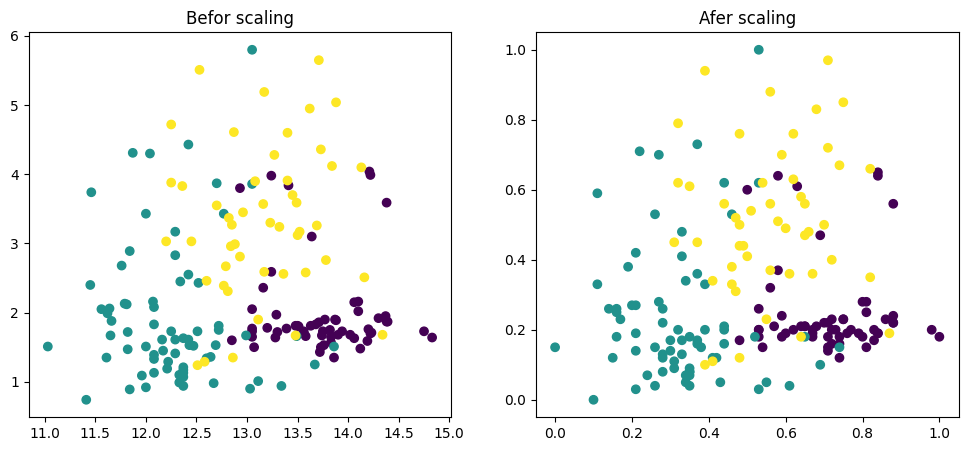

In [41]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(df['Alcohol'],df['Malic acid'],c=df['class label'])
ax1.set_title('Befor scaling')
ax2.scatter(new_x['Alcohol'], new_x['Malic acid'],c=df['class label'])
ax2.set_title('Afer scaling')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

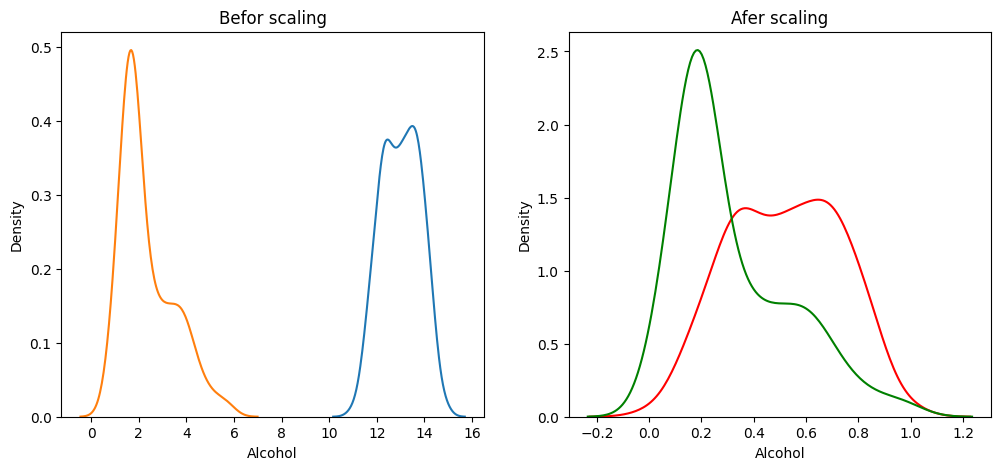

In [42]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(df['Alcohol'], ax=ax1)
sns.kdeplot(df['Malic acid'],ax=ax1)
ax1.set_title('Befor scaling')

sns.kdeplot(new_x['Alcohol'], ax=ax2,color='red')
sns.kdeplot(new_x['Malic acid'],ax=ax2,color='green')
ax2.set_title('Afer scaling')
plt.show()

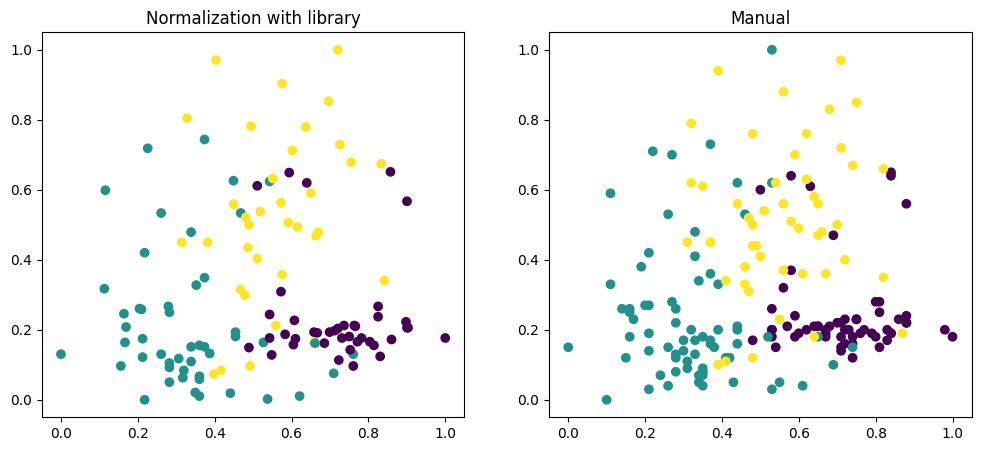

In [45]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train_scaler['Alcohol'],x_train_scaler['Malic acid'],c=y_train['class label'])
ax1.set_title('Normalization with library')
ax2.scatter(new_x['Alcohol'], new_x['Malic acid'],c=df['class label'])
ax2.set_title('Manual')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

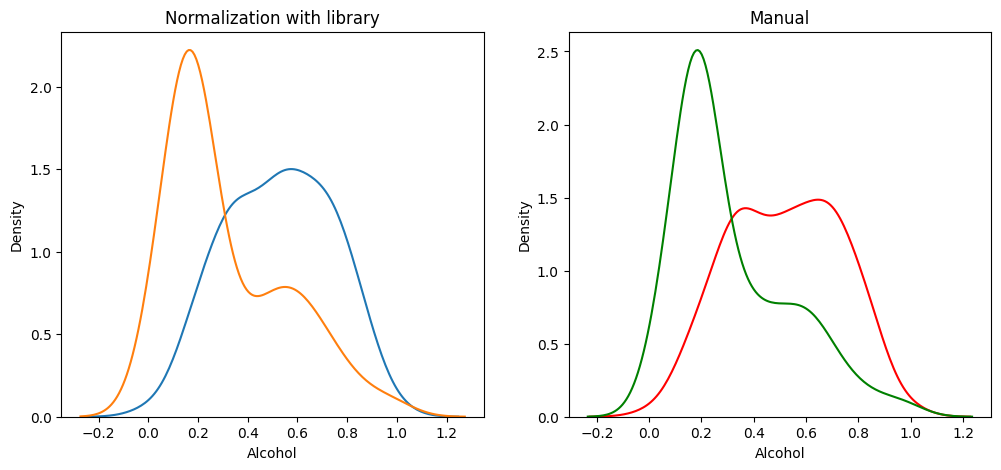

In [46]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x_train_scaler['Alcohol'], ax=ax1)
sns.kdeplot(x_train_scaler['Malic acid'],ax=ax1)
ax1.set_title('Normalization with library')

sns.kdeplot(new_x['Alcohol'], ax=ax2,color='red')
sns.kdeplot(new_x['Malic acid'],ax=ax2,color='green')
ax2.set_title('Manual')
plt.show()

we compare the Noramalization with library use and manual but no different in it. but we use different data set size so some different may be seen but  actually both are same